<a href="https://colab.research.google.com/github/eduardomessias/predictord/blob/main/SMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Description: This program uses the dual moving average crossover to determine
when to buy and sell stock.

In [46]:
# Import the libraries
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [47]:
# Import yfinance
!pip install yfinance
import yfinance as yf

In [61]:
# Get stock ticker
msft = yf.Ticker('MSFT')

# Get stock info
msft.info

{'52WeekChange': 0.49961853,
 'SandP52WeekChange': 0.1401484,
 'address1': 'One Microsoft Way',
 'algorithm': None,
 'annualHoldingsTurnover': None,
 'annualReportExpenseRatio': None,
 'ask': 217,
 'askSize': 1200,
 'averageDailyVolume10Day': 23317500,
 'averageVolume': 32124352,
 'averageVolume10days': 23317500,
 'beta': 0.923331,
 'beta3Year': None,
 'bid': 216.86,
 'bidSize': 900,
 'bookValue': 15.626,
 'category': None,
 'circulatingSupply': None,
 'city': 'Redmond',
 'companyOfficers': [],
 'country': 'United States',
 'currency': 'USD',
 'dateShortInterest': 1601424000,
 'dayHigh': 216.28,
 'dayLow': 213.16,
 'dividendRate': 2.24,
 'dividendYield': 0.0104,
 'earningsQuarterlyGrowth': -0.151,
 'enterpriseToEbitda': 24.241,
 'enterpriseToRevenue': 11.062,
 'enterpriseValue': 1581971537920,
 'exDividendDate': 1605657600,
 'exchange': 'NMS',
 'exchangeTimezoneName': 'America/New_York',
 'exchangeTimezoneShortName': 'EDT',
 'expireDate': None,
 'fiftyDayAverage': 210.26057,
 'fiftyTwo

In [162]:
hist = msft.history(period="5y")
hist

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2015-10-26,47.739010,49.365755,47.711748,49.302139,64633300,0.0,0
2015-10-27,49.065854,49.411194,48.693248,48.793213,50999900,0.0,0
2015-10-28,48.656894,49.056763,48.038913,49.056763,47000800,0.0,0
2015-10-29,48.656900,48.920452,48.366086,48.493317,30202100,0.0,0
2015-10-30,48.456959,49.065853,47.820801,47.838978,46619800,0.0,0
...,...,...,...,...,...,...,...
2020-10-19,220.419998,222.300003,213.720001,214.220001,27625800,0.0,0
2020-10-20,215.800003,217.369995,213.089996,214.649994,22753500,0.0,0
2020-10-21,213.119995,216.919998,213.119995,214.800003,22724900,0.0,0


In [163]:
msft.recommendations

,Firm,To Grade,From Grade,Action
Date,,,,
2012-03-16 08:19:00,Argus Research,Buy,,up
2012-03-19 14:00:00,Hilliard Lyons,Long-Term Buy,,main
2012-03-22 07:03:00,Morgan Stanley,Overweight,,main
2012-04-03 11:53:00,UBS,Buy,,main
2012-04-20 06:18:00,Deutsche Bank,Buy,,main
...,...,...,...,...
2020-07-23 13:06:12,Oppenheimer,Perform,Outperform,down
2020-09-09 12:01:51,Morgan Stanley,Overweight,,main
2020-10-13 16:40:00,RBC Capital,Outperform,,main


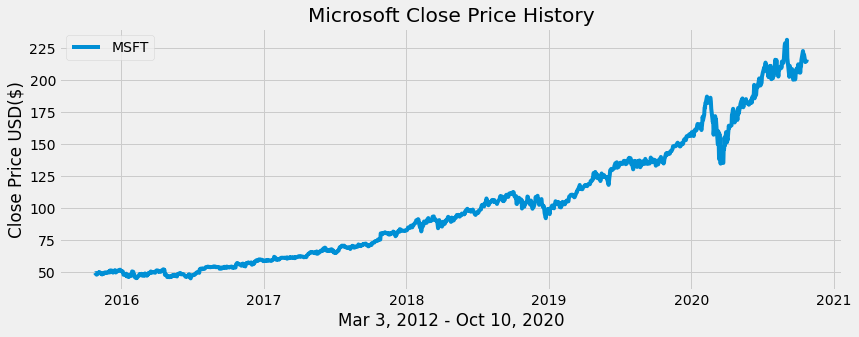

In [164]:
# Visualize historical data
plt.figure(figsize=(12.5, 4.5))
plt.plot(hist['Close'], label = 'MSFT')
plt.title('Microsoft Close Price History')
plt.xlabel('Mar 3, 2012 - Oct 10, 2020')
plt.ylabel('Close Price USD($)')
plt.legend(loc='upper left')
plt.show()

In [165]:
# Create the simple moving average within a 30 days window
SMA30 = pd.DataFrame()
SMA30['Close'] = hist['Close'].rolling(window=30).mean()
SMA30

,Close
2015-10-26,NaN
2015-10-27,NaN
2015-10-28,NaN
2015-10-29,NaN
2015-10-30,NaN
...,...
2020-10-19,209.476667
2020-10-20,209.876334
2020-10-21,209.993334
2020-10-22,210.310667


In [166]:
SMA100 = pd.DataFrame()
SMA100['Close'] = hist['Close'].rolling(window=100).mean()
SMA100

,Close
2015-10-26,NaN
2015-10-27,NaN
2015-10-28,NaN
2015-10-29,NaN
2015-10-30,NaN
...,...
2020-10-19,206.268434
2020-10-20,206.586853
2020-10-21,206.910962
2020-10-22,207.215221


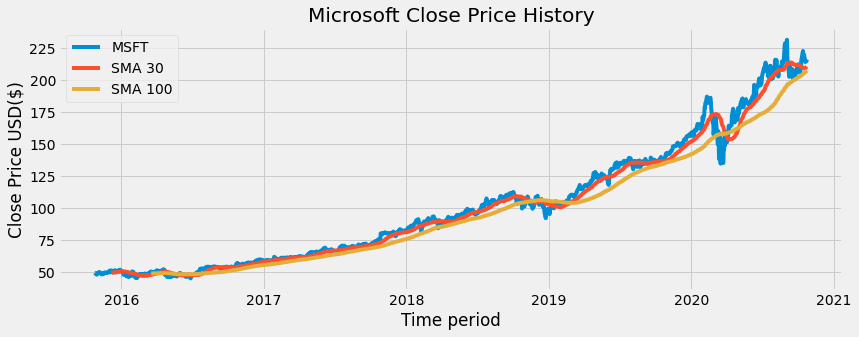

In [167]:
# Visualize historical data + SMA30 and SMA100
plt.figure(figsize=(12.5, 4.5))
plt.plot(hist['Close'], label = 'MSFT')
plt.plot(SMA30['Close'], label = 'SMA 30')
plt.plot(SMA100['Close'], label = 'SMA 100')
plt.title('Microsoft Close Price History')
plt.xlabel('Time period')
plt.ylabel('Close Price USD($)')
plt.legend(loc='upper left')
plt.show()

In [168]:
# Create a data frame to store the data
data = pd.DataFrame()
data['MSFT'] = hist['Close']
data['SMA30'] = SMA30['Close']
data['SMA100'] = SMA100['Close']

data

,MSFT,SMA30,SMA100
2015-10-26,49.302139,NaN,NaN
2015-10-27,48.793213,NaN,NaN
2015-10-28,49.056763,NaN,NaN
2015-10-29,48.493317,NaN,NaN
2015-10-30,47.838978,NaN,NaN
...,...,...,...
2020-10-19,214.220001,209.476667,206.268434
2020-10-20,214.649994,209.876334,206.586853
2020-10-21,214.800003,209.993334,206.910962
2020-10-22,214.889999,210.310667,207.215221


In [169]:
# Create the signals
def buy_sell(data):
  bid = []
  ask = []
  flag = -1

  for i in range(len(data)):
    b = np.nan
    a = np.nan

    if data['SMA30'][i] > data['SMA100'][i] and flag != 1:      
        b = data['MSFT'][i]
        flag = 1

    if data['SMA30'][i] < data['SMA100'][i] and flag != 0:      
        a = data['MSFT'][i]
        flag = 0
    
    bid.append(b)
    ask.append(a) 
    
  return (bid, ask)

In [170]:
# Store buy and sell signals
buy_sell = buy_sell(data)

data['BID'] = buy_sell[0]
data['ASK'] = buy_sell[1]

In [171]:
# data.dropna()
data

,MSFT,SMA30,SMA100,BID,ASK
2015-10-26,49.302139,NaN,NaN,NaN,NaN
2015-10-27,48.793213,NaN,NaN,NaN,NaN
2015-10-28,49.056763,NaN,NaN,NaN,NaN
2015-10-29,48.493317,NaN,NaN,NaN,NaN
2015-10-30,47.838978,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2020-10-19,214.220001,209.476667,206.268434,NaN,NaN
2020-10-20,214.649994,209.876334,206.586853,NaN,NaN
2020-10-21,214.800003,209.993334,206.910962,NaN,NaN
2020-10-22,214.889999,210.310667,207.215221,NaN,NaN


In [172]:
data.index

DatetimeIndex(['2015-10-26', '2015-10-27', '2015-10-28', '2015-10-29',
               '2015-10-30', '2015-11-02', '2015-11-03', '2015-11-04',
               '2015-11-05', '2015-11-06',
               ...
               '2020-10-12', '2020-10-13', '2020-10-14', '2020-10-15',
               '2020-10-16', '2020-10-19', '2020-10-20', '2020-10-21',
               '2020-10-22', '2020-10-23'],
              dtype='datetime64[ns]', length=1259, freq=None)

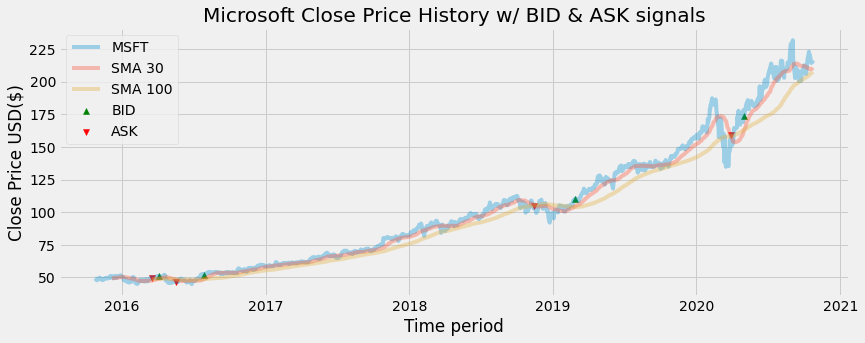

In [173]:
# Visualize data and strategy
plt.figure(figsize=(12.6,4.6))
plt.plot(data['MSFT'], label = 'MSFT', alpha = .35)
plt.plot(data['SMA30'], label = 'SMA 30', alpha = .35)
plt.plot(data['SMA100'], label = 'SMA 100', alpha = .35)
plt.scatter(data.index, data['BID'], label = 'BID', marker = '^', color = 'green')
plt.scatter(data.index, data['ASK'], label = 'ASK', marker = 'v', color = 'red')
plt.title('Microsoft Close Price History w/ BID & ASK signals')
plt.xlabel('Time period')
plt.ylabel('Close Price USD($)')
plt.legend(loc='upper left')
plt.show()